# Laporan Analisis Data Lagu Spotify

## 1. Pendahuluan
Proyek ini bertujuan untuk menganalisis dataset lagu-lagu Spotify yang berisi metadata dari sekitar 5000 lagu dengan berbagai genre (EDM, Latin, Pop, R&B, Rap, dan Rock). Fokus analisis adalah pada fitur-fitur audio seperti `danceability`, `energy`, `valence`, dan `loudness`.

## 2. Deskripsi Data
Dataset ini terdiri dari beberapa kolom penting, seperti:
- `track_id`: ID unik untuk setiap lagu.
- `track_name`: Nama lagu.
- `track_artist`: Nama artis.
- `track_popularity`: Popularitas lagu.
- `playlist_name`: Nama playlist yang berisi lagu.
- `playlist_genre`: Genre playlist tempat lagu tersebut.
- Fitur audio lainnya: `danceability`, `energy`, `valence`, `loudness`, dll.

## 3. Pembersihan Data
Langkah-langkah yang dilakukan untuk membersihkan dataset:
- Mengimputasi nilai yang hilang untuk fitur numerik dengan nilai rata-rata.
- Mengimputasi nilai yang hilang untuk fitur non-numerik dengan nilai "Unknown".
- Memastikan tipe data kolom sudah sesuai.

## 4. Eksplorasi Data
Beberapa temuan penting dari eksplorasi data:
- Distribusi fitur audio seperti `danceability`, `energy`, `valence`, dan `loudness` menunjukkan pola tertentu berdasarkan genre.
- Korelasi yang tinggi ditemukan antara `energy` dan `danceability`.
- Genre playlist memiliki pengaruh signifikan terhadap fitur-fitur audio lagu.

### Visualisasi:
![Korelasi Fitur Audio](correlation_matrix.png)

## 5. Pembuatan Variabel Mood
Variabel `mood` dibuat berdasarkan kombinasi `energy` dan `valence`:
- `Energetic and Positive`
- `Energetic and Negative`
- `Calm and Positive`
- `Calm and Negative`

Distribusi mood dalam dataset menunjukkan bahwa banyak lagu termasuk dalam kategori `Energetic and Positive`.

## 6. Kesimpulan
Dari analisis ini, dapat disimpulkan bahwa fitur audio seperti `energy` dan `valence` sangat memengaruhi mood lagu. Selain itu, genre playlist juga memainkan peran penting dalam karakteristik audio lagu.



In [1]:
!pip install tidyverse
!pip install ggcorrplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: plotnine
    Found existing installation: plotnine 0.14.4
    Uninstalling plotnine-0.14.4:
      Successfully uninstalled plotnine-0.14.4


In [2]:
# Impor library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengimpor dataset dari URL
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-01-21/spotify_songs.csv'
spotify_songs = pd.read_csv(url)

# Melihat beberapa baris pertama dataset
spotify_songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
# Memilih hanya kolom numerik
numeric_cols = spotify_songs.select_dtypes(include=['float64', 'int64']).columns

# Imputasi nilai yang hilang untuk kolom numerik dengan rata-rata
spotify_songs_clean = spotify_songs.copy()
spotify_songs_clean[numeric_cols] = spotify_songs_clean[numeric_cols].fillna(spotify_songs_clean[numeric_cols].mean())

# Memastikan bahwa nilai yang hilang telah diimputasi
spotify_songs_clean.isnull().sum()


,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [5]:
# Memilih kolom non-numerik
non_numeric_cols = spotify_songs.select_dtypes(exclude=['float64', 'int64']).columns

# Imputasi nilai yang hilang untuk kolom non-numerik (misalnya dengan nilai 'Unknown')
for col in non_numeric_cols:
    spotify_songs_clean[col] = spotify_songs_clean[col].fillna('Unknown')

# Memastikan nilai yang hilang di kolom non-numerik juga telah diimputasi
spotify_songs_clean.isnull().sum()


,0
track_id,0
track_name,0
track_artist,0
track_popularity,0
track_album_id,0
track_album_name,0
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [6]:
# Mengonversi kolom tertentu ke tipe numerik jika diperlukan
spotify_songs_clean['tempo'] = pd.to_numeric(spotify_songs_clean['tempo'], errors='coerce')  # 'coerce' mengubah nilai yang tidak bisa dikonversi menjadi NaN

# Mengimputasi kembali nilai yang hilang pada kolom yang baru dikonversi
spotify_songs_clean['tempo'] = spotify_songs_clean['tempo'].fillna(spotify_songs_clean['tempo'].mean())

# Periksa nilai yang hilang setelah pembersihan
spotify_songs_clean.isnull().sum()


,0
track_id,0
track_name,0
track_artist,0
track_popularity,0
track_album_id,0
track_album_name,0
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


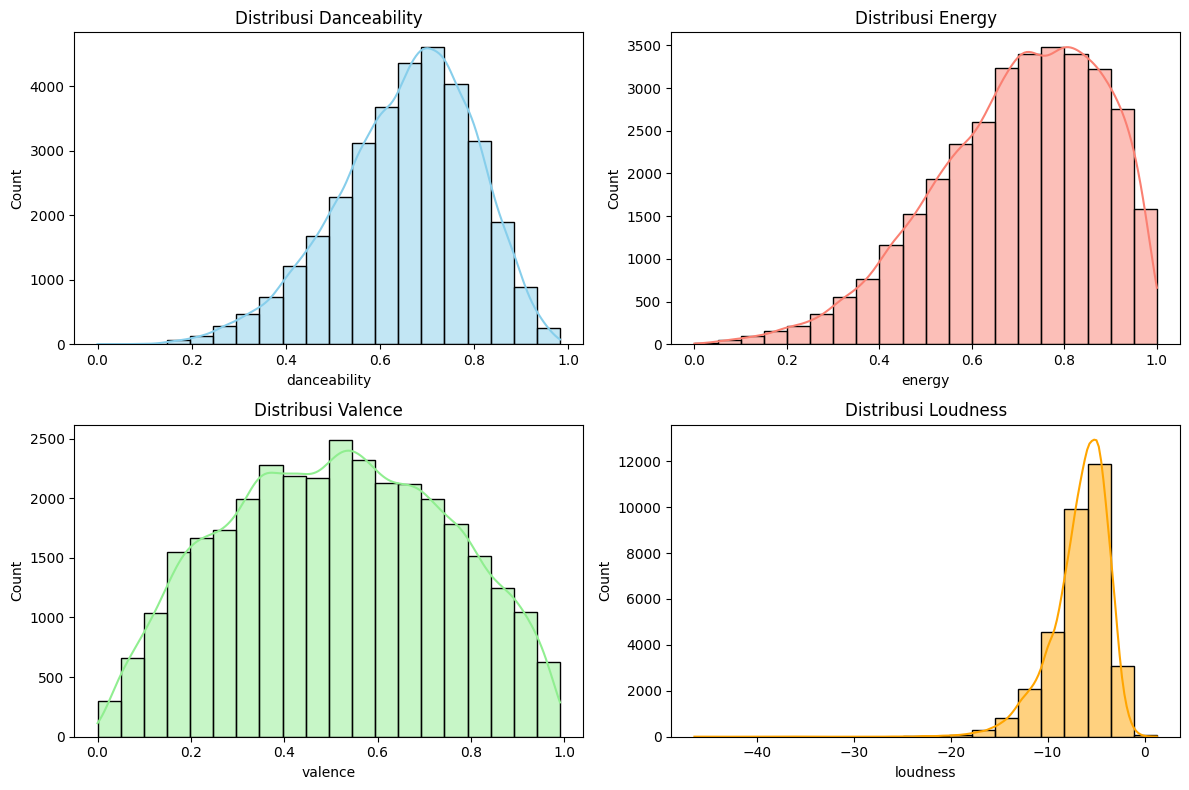

In [7]:
# Visualisasi distribusi fitur numerik: danceability, energy, valence, loudness
plt.figure(figsize=(12, 8))

# Danceability
plt.subplot(2, 2, 1)
sns.histplot(spotify_songs_clean['danceability'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Danceability')

# Energy
plt.subplot(2, 2, 2)
sns.histplot(spotify_songs_clean['energy'], bins=20, kde=True, color='salmon')
plt.title('Distribusi Energy')

# Valence
plt.subplot(2, 2, 3)
sns.histplot(spotify_songs_clean['valence'], bins=20, kde=True, color='lightgreen')
plt.title('Distribusi Valence')

# Loudness
plt.subplot(2, 2, 4)
sns.histplot(spotify_songs_clean['loudness'], bins=20, kde=True, color='orange')
plt.title('Distribusi Loudness')

plt.tight_layout()
plt.show()


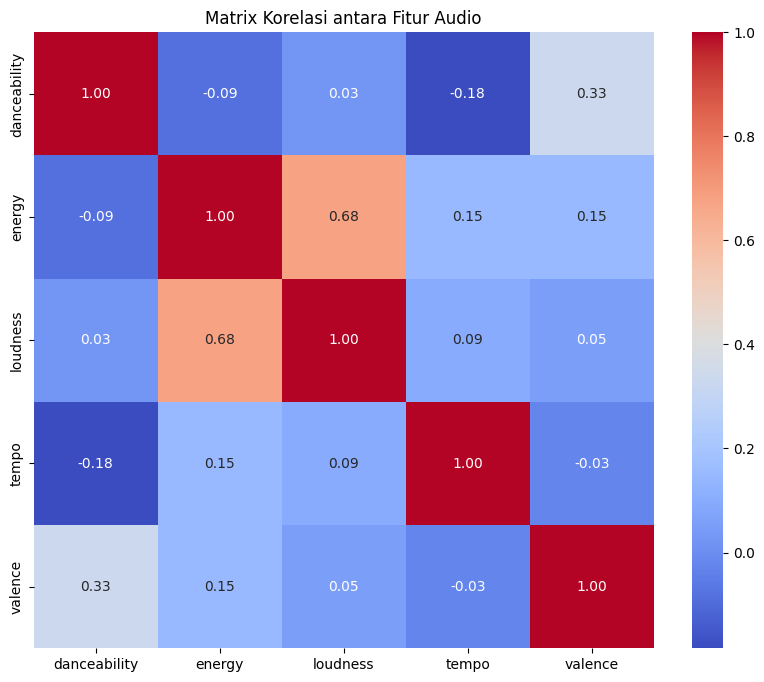

In [8]:
# Menghitung korelasi antar fitur numerik
correlation_matrix = spotify_songs_clean[['danceability', 'energy', 'loudness', 'tempo', 'valence']].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix Korelasi antara Fitur Audio')
plt.show()


<ipython-input-11-748d3ee14598>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playlist_genre', y='danceability', data=spotify_songs_clean, palette='Set1')


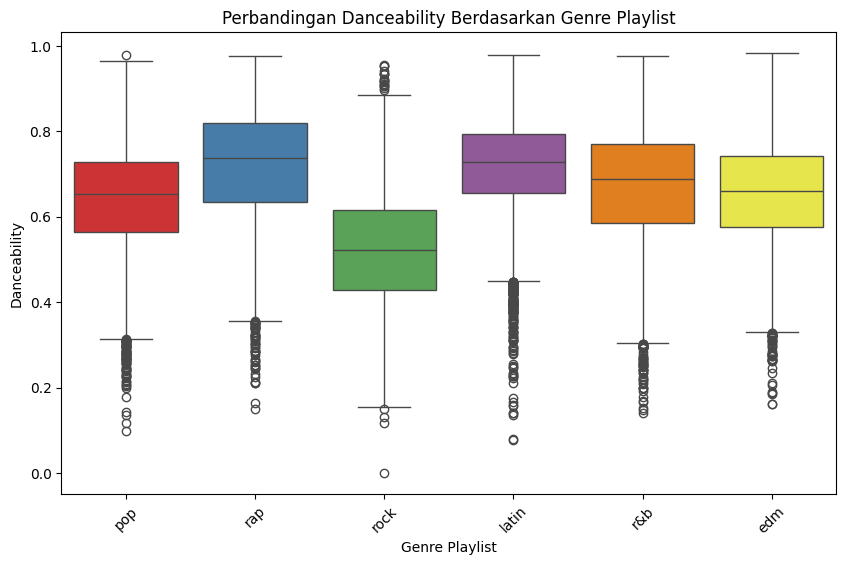

In [11]:
# Boxplot untuk perbandingan danceability berdasarkan playlist_genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='playlist_genre', y='danceability', data=spotify_songs_clean, palette='Set1')
plt.title('Perbandingan Danceability Berdasarkan Genre Playlist')
plt.xlabel('Genre Playlist')
plt.ylabel('Danceability')
plt.xticks(rotation=45)
plt.show()


<ipython-input-12-58a1059f9208>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playlist_genre', y='energy', data=spotify_songs_clean, palette='Set2')


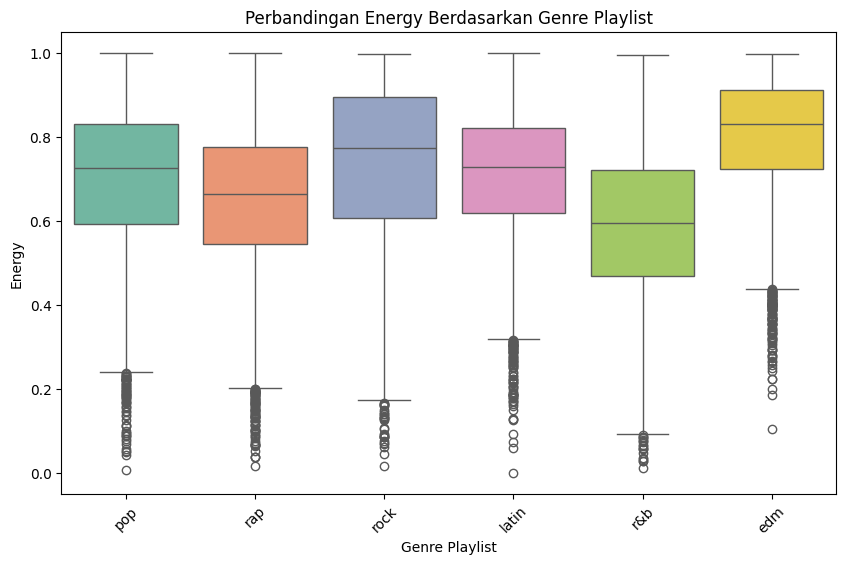

<ipython-input-12-58a1059f9208>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playlist_genre', y='loudness', data=spotify_songs_clean, palette='Set3')


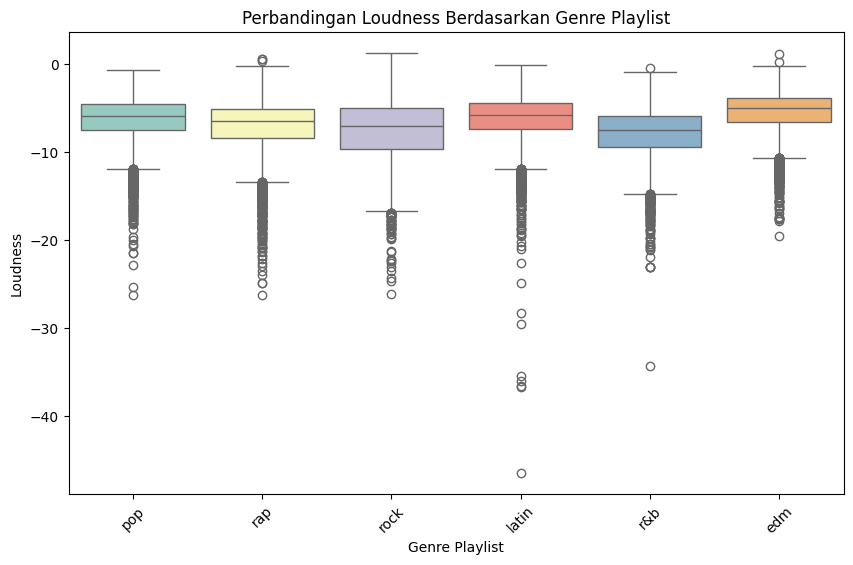

In [12]:
# Boxplot untuk perbandingan energy berdasarkan playlist_genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='playlist_genre', y='energy', data=spotify_songs_clean, palette='Set2')
plt.title('Perbandingan Energy Berdasarkan Genre Playlist')
plt.xlabel('Genre Playlist')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.show()

# Boxplot untuk perbandingan loudness berdasarkan playlist_genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='playlist_genre', y='loudness', data=spotify_songs_clean, palette='Set3')
plt.title('Perbandingan Loudness Berdasarkan Genre Playlist')
plt.xlabel('Genre Playlist')
plt.ylabel('Loudness')
plt.xticks(rotation=45)
plt.show()


In [13]:
# Membuat variabel mood berdasarkan kombinasi energy dan valence
def classify_mood(row):
    if row['energy'] > 0.7 and row['valence'] > 0.7:
        return 'Energetic and Positive'
    elif row['energy'] > 0.7 and row['valence'] <= 0.7:
        return 'Energetic and Negative'
    elif row['energy'] <= 0.7 and row['valence'] > 0.7:
        return 'Calm and Positive'
    else:
        return 'Calm and Negative'

# Terapkan fungsi ke setiap baris untuk membuat kolom 'mood'
spotify_songs_clean['mood'] = spotify_songs_clean.apply(classify_mood, axis=1)

# Melihat beberapa baris pertama untuk memastikan kolom 'mood' ditambahkan dengan benar
spotify_songs_clean[['track_name', 'energy', 'valence', 'mood']].head()


,track_name,energy,valence,mood
0,I Don't Care (with Justin Bieber) - Loud Luxur...,0.916,0.518,Energetic and Negative
1,Memories - Dillon Francis Remix,0.815,0.693,Energetic and Negative
2,All the Time - Don Diablo Remix,0.931,0.613,Energetic and Negative
3,Call You Mine - Keanu Silva Remix,0.930,0.277,Energetic and Negative
4,Someone You Loved - Future Humans Remix,0.833,0.725,Energetic and Positive


<ipython-input-14-1808635c2a58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mood', data=spotify_songs_clean, palette='coolwarm')


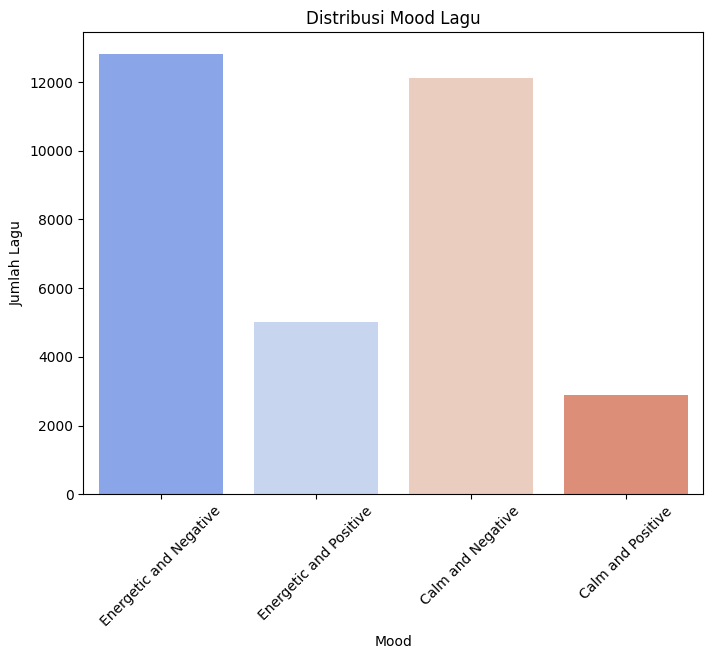

In [14]:
# Visualisasi distribusi mood
plt.figure(figsize=(8, 6))
sns.countplot(x='mood', data=spotify_songs_clean, palette='coolwarm')
plt.title('Distribusi Mood Lagu')
plt.xlabel('Mood')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=45)
plt.show()


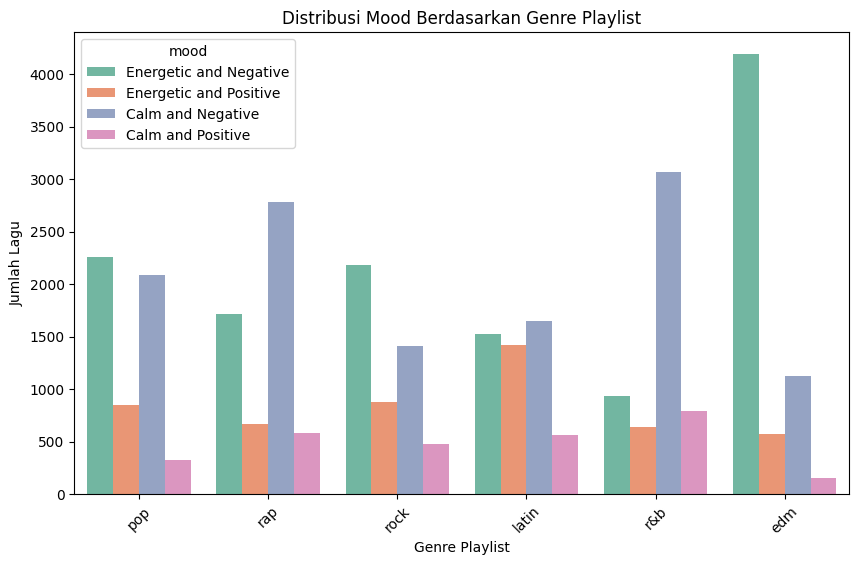

In [15]:
# Visualisasi mood berdasarkan genre playlist
plt.figure(figsize=(10, 6))
sns.countplot(x='playlist_genre', hue='mood', data=spotify_songs_clean, palette='Set2')
plt.title('Distribusi Mood Berdasarkan Genre Playlist')
plt.xlabel('Genre Playlist')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Menyimpan dataset bersih dengan kolom mood yang baru
spotify_songs_clean.to_csv('spotify_songs_with_mood.csv', index=False)
